# **EDA - Project - Sugarcane Production in World**

In [2]:
# Importing all necessary libraries
    
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import wordcloud as wc 

In [3]:
# Importing 'Sugarcane.csv' file named as 'df'
df = pd.read_csv('Sugarcane.csv')
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
# Checking null values & dtypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [5]:
# Having Overview of dataset
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


## **Data Cleaning**

In [6]:
# Changing the format of 'Production (Tons)', 'Production per Person (Kg)', 'Acreage (Hectare)', 'Yield (Kg / Hectare)' columns to standard Cols
# Here dataset is following German Nomenclautre of Numbering System, hence we're converting it to normal numbers for various operations.

# Replacing . in '768.678.382' to nothing.
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")

# Replacing . in '3.668,531' to '' nothing to make it look like '3668,531', and further replacing ',' with '' nothing to look like '3668531'.
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")

# Replacing . in '10.226.205' to nothing.
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")

# Replacing . in '75.167,5' to '' nothing to make it look like '75167,5', and further replacing ',' with '' nothing to look like '751675'.
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

C:\Users\RKC\AppData\Local\Temp\ipykernel_14652\637188239.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
C:\Users\RKC\AppData\Local\Temp\ipykernel_14652\637188239.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
C:\Users\RKC\AppData\Local\Temp\ipykernel_14652\637188239.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Acreage (Hec

In [7]:
# Renaming the Columns for easy usage.

# (inplace = True) helps renaming the data permanently in main file.
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)   

df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)

df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)

df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [8]:
# Checking the dtype of cols to make changes further.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 103 non-null    int64 
 1   Country                    103 non-null    object
 2   Continent                  103 non-null    object
 3   Production(Tons)           103 non-null    object
 4   Production_per_person(Kg)  103 non-null    object
 5   Acreage(Hectare)           102 non-null    object
 6   Yield(Kg/Hectare)          102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [9]:
"""Changing the data type of columns to numerical columns as those are 'object' type, and we need it to be in 'int' or 'float' to 
perform operations, We are converting those values to 'float' as the columns contains data in decimals as well."""

# Here 'astype(float)' helps change the data type of that column into float values from string. 
df["Production(Tons)"] = df["Production(Tons)"].astype(float)

df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)

df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)

df["Yield(Kg/Hectare)"]= df["Yield(Kg/Hectare)"].astype(float)

In [10]:
# Here we can check that the respective mentioned columns above are converter to 'float64' data type, which will further help in mathematical calc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 103 non-null    int64  
 1   Country                    103 non-null    object 
 2   Continent                  103 non-null    object 
 3   Production(Tons)           103 non-null    float64
 4   Production_per_person(Kg)  103 non-null    float64
 5   Acreage(Hectare)           102 non-null    float64
 6   Yield(Kg/Hectare)          102 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [11]:
# We try to understand whether there are any null values in any columns particularly.

df.isnull().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [13]:
# We drop column named 'Unnamed: 0' as this columns does not makes any sense for our observations.

df = df.drop(columns = 'Unnamed: 0')

In [12]:
# The above output show that we've 2 cells empty, hence we remove those rows as those are only 2, hence they might not affect much.

df.dropna(inplace = True)

In [14]:
# After removing 2 null values we check for null values again.

df.isnull().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             0
Yield(Kg/Hectare)            0
dtype: int64

In [54]:
# Our shape of datatset is changes from (103,6) to (102,6), as we've removed null valued rows.

df.shape

(102, 6)

In [16]:
# Checking for any duplicate rows present in data.

df.duplicated().sum()

0

In [187]:
# Saving clean & sorted data to another csv file

df = df.to_csv("Cleaned_Sugarcane.csv")

# **Analysis**

In [17]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### **What is the percent share of each continent in world on production of 'Sugarcane'?**

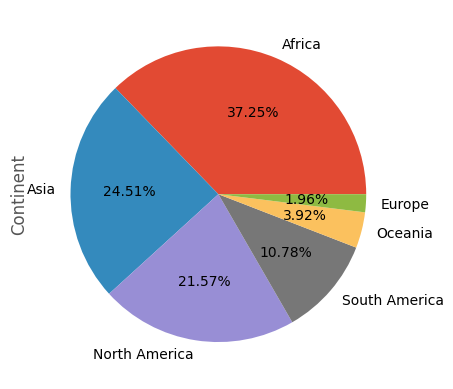

In [18]:
# They style helps us selecft the style we want to use for displaying our charts from available styles from library
plt.style.use('ggplot')

# '.plot' plots the graph that we want, 'kind' helps choose the type of graph we want to plot & 'autopct' shows percentages on our graph
df['Continent'].value_counts().plot(kind = 'pie', autopct='%.2f%%')
plt.show()

### **Show the relationship between 'Acreage(Hectare)' and 'Production(Tons)'**

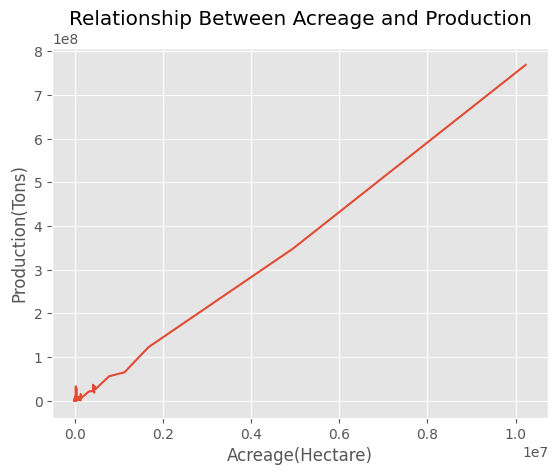

In [108]:
# Seaborn's line plot is used to show the direct relationship between 'Acreage' and 'Production(Tons)'

sns.lineplot(data = df, x = 'Acreage(Hectare)', y='Production(Tons)', legend = 'auto')
plt.title('Relationship Between Acreage and Production')
plt.show()

### **Checking for outliers - Numerical Columns** 

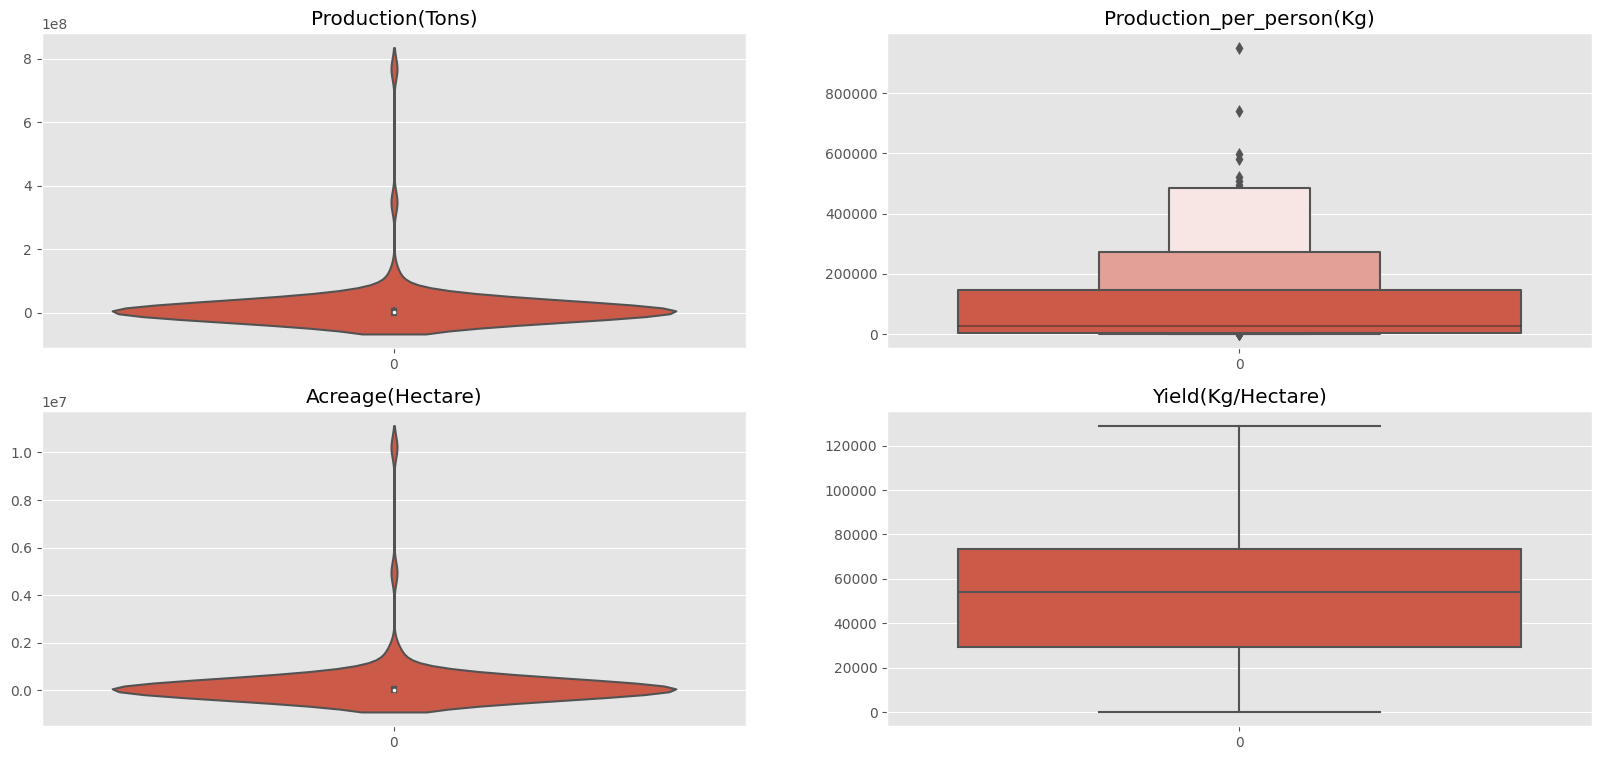

In [171]:
plt.figure(figsize = (20,9))
plt.subplot(2,2,1)
sns.violinplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxenplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.violinplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

## **Distribution of columns** 
- Identifying the spread of data in dataset 

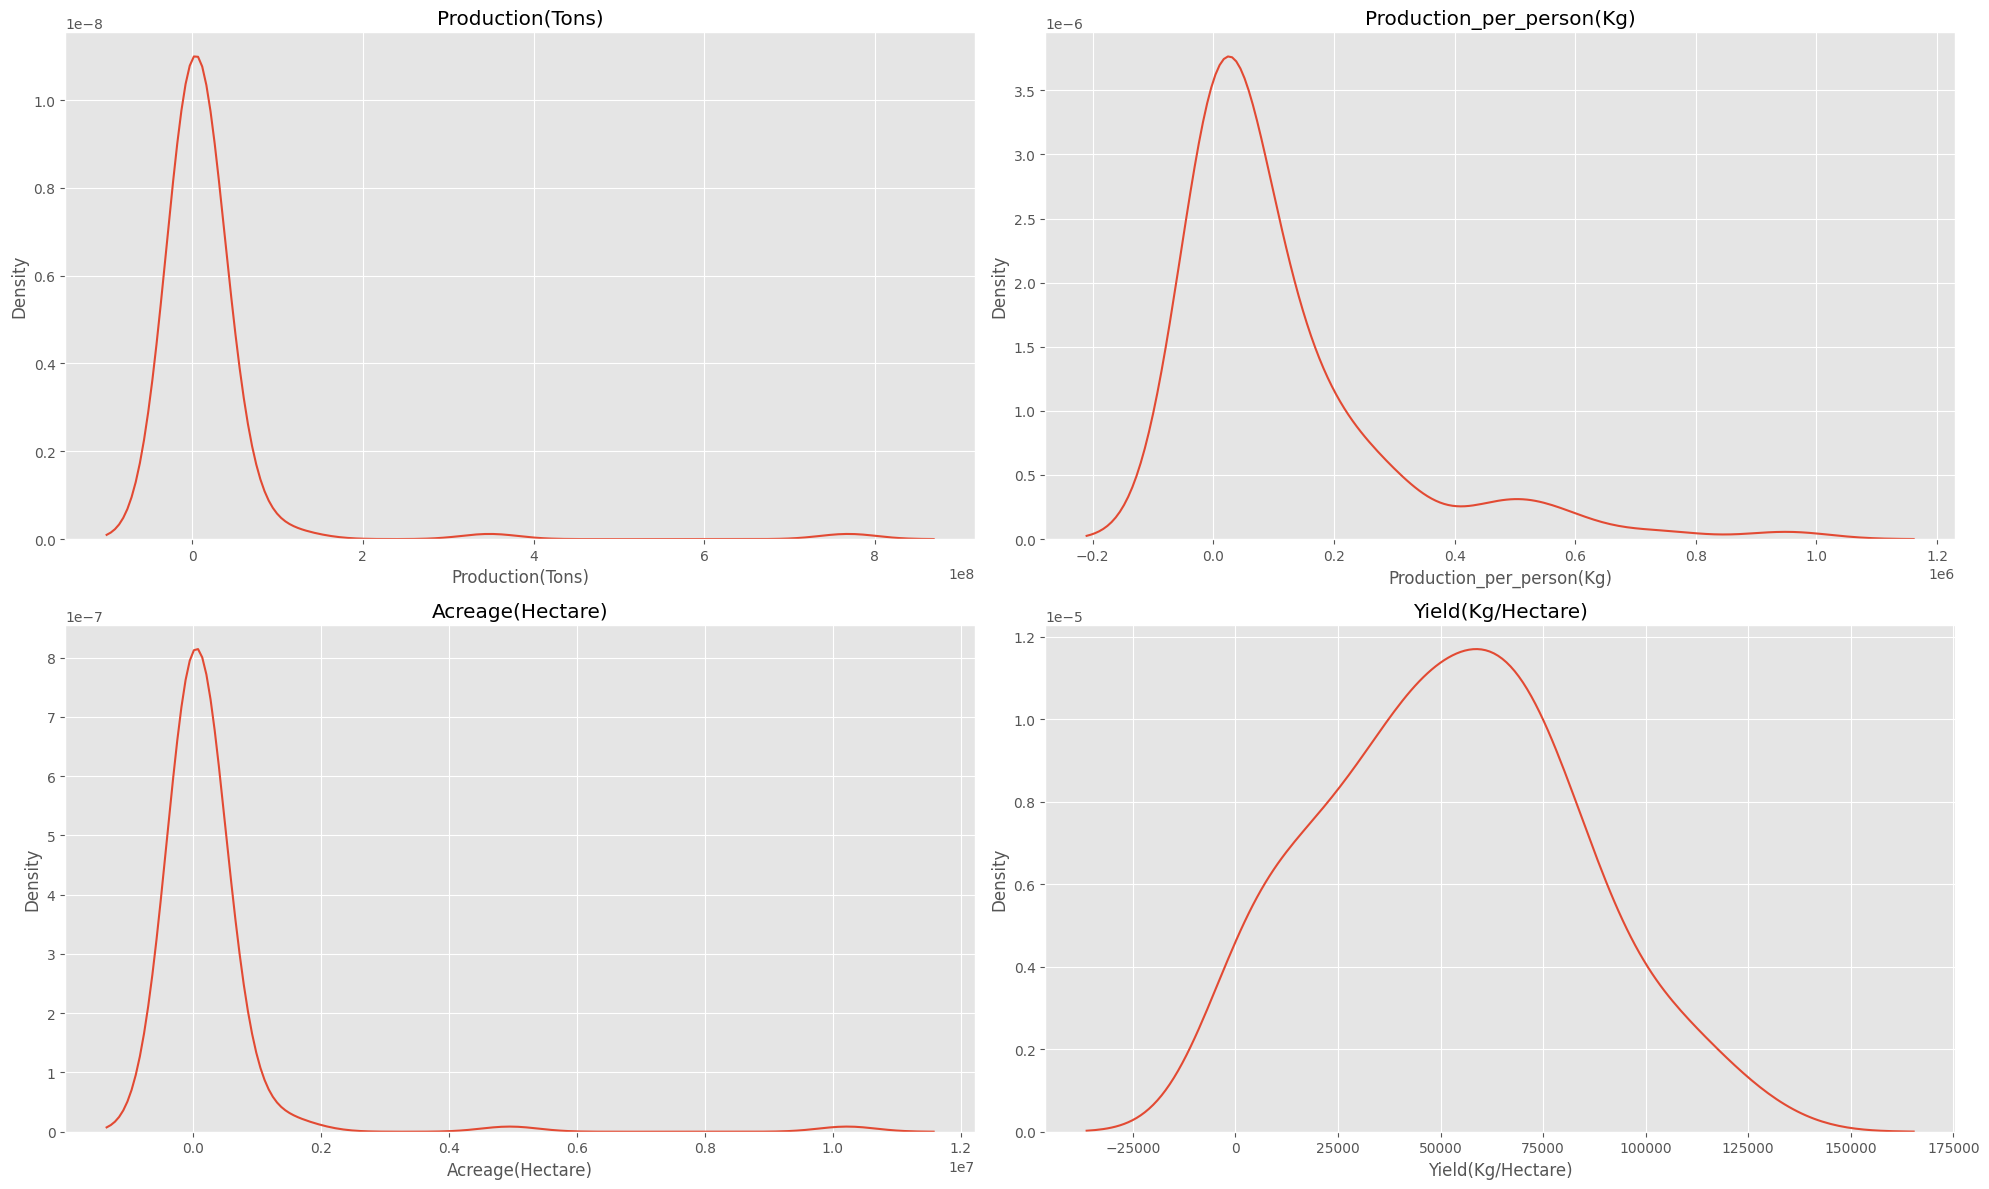

In [185]:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
sns.kdeplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.kdeplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.kdeplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.kdeplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.tight_layout()
plt.show()

## **Which 5 countries produces maximum sugarcane?**

In [21]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [72]:
# to check whether ther are any duplicate values of country in data. 
df['Country'].nunique()

102

In [73]:
# The above code gets proved that every country in data is unique, as the rows matches the unique values of country
df.shape

(102, 6)

In [101]:
# We create an another dataset for 'Country' and 'Production'.

Country_prod = df[["Country","Production(Tons)"]]
Country_prod

,Country,Production(Tons)
0,Brazil,768678382.0
1,India,348448000.0
2,China,123059739.0
3,Thailand,87468496.0
4,Pakistan,65450704.0
...,...,...
97,Spain,394.0
98,Lebanon,97.0
100,Singapore,50.0
101,Samoa,12.0


In [114]:
# Adding an column named "Production(Tons)_percent" in above created new dataset.

Country_prod["Production(Tons)_percent"] = (Country_prod["Production(Tons)"]/Country_prod["Production(Tons)"].sum()) * 100
Country_prod.head(5)

,Country,Production(Tons),Production(Tons)_percent
0,Brazil,768678382.0,40.727285
1,India,348448000.0,18.462001
2,China,123059739.0,6.520138
3,Thailand,87468496.0,4.634389
4,Pakistan,65450704.0,3.467809


In [115]:
# Sorting the rows in table by descending order of 'Production(Tons)_precentage'.

Country_prod = Country_prod.sort_values(by = 'Production(Tons)_percent',ascending =False)

In [116]:
Country_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 102
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   102 non-null    object 
 1   Production(Tons)          102 non-null    float64
 2   Production(Tons)_percent  102 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.2+ KB


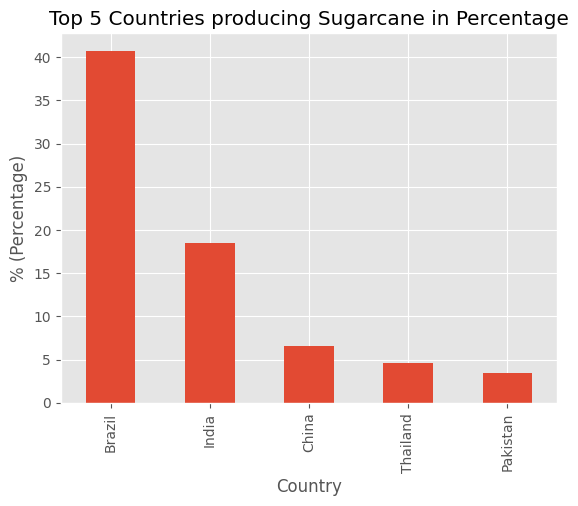

In [163]:
# Bar graph is used to mention top 5 countries producing maximum sugarcane in the world.

Country_prod["Production(Tons)_percent"].head(5).plot(kind = 'bar')
plt.title('Top 5 Countries producing Sugarcane in Percentage')
plt.ylabel('% (Percentage)')
plt.show()

### **Which are the countries having larger acres of land in the world?**  

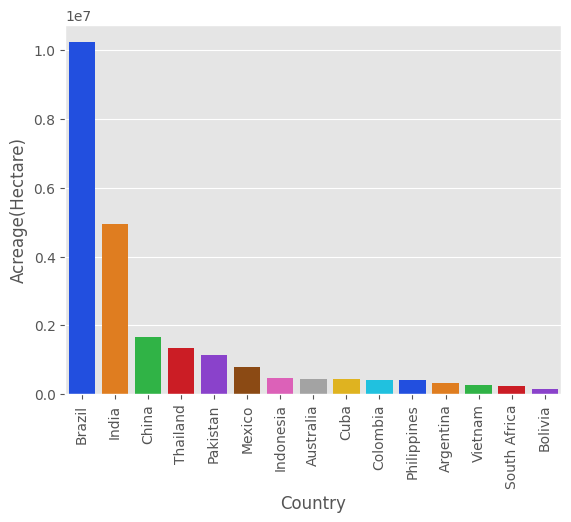

In [182]:
df_acr = df.sort_values("Acreage(Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)", palette='bright')
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

### **Which are the top Yielding sugarcane countries irrespective or land (in acres)?**

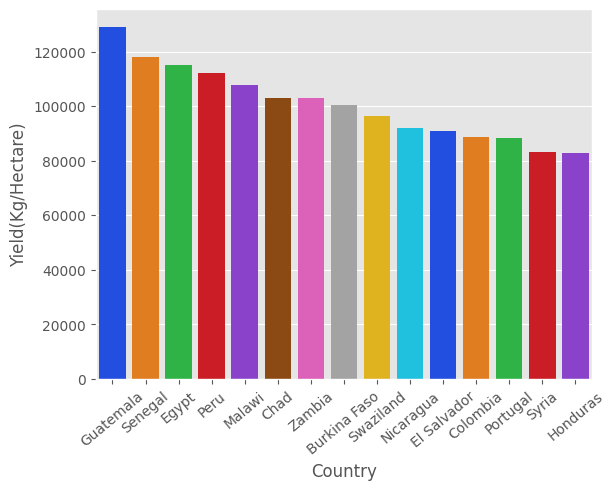

In [181]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)", palette='bright')
ax.set_xticklabels(ax.get_xticklabels(),rotation =40)
plt.show()

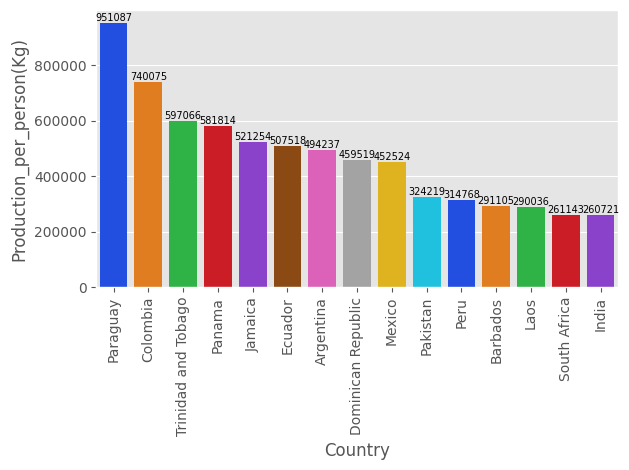

In [180]:
df_yield = df.sort_values("Production_per_person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_person(Kg)", palette='bright')
ax.bar_label(ax.containers[0], fontsize=7)
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.tight_layout()
plt.show()

## **Find the correlation between columns (1:Highly correlated, 0:Least corelated)**

In [157]:
df.corr()

C:\Users\RKC\AppData\Local\Temp\ipykernel_14652\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


C:\Users\RKC\AppData\Local\Temp\ipykernel_14652\3094027229.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = df.corr())


<Axes: >

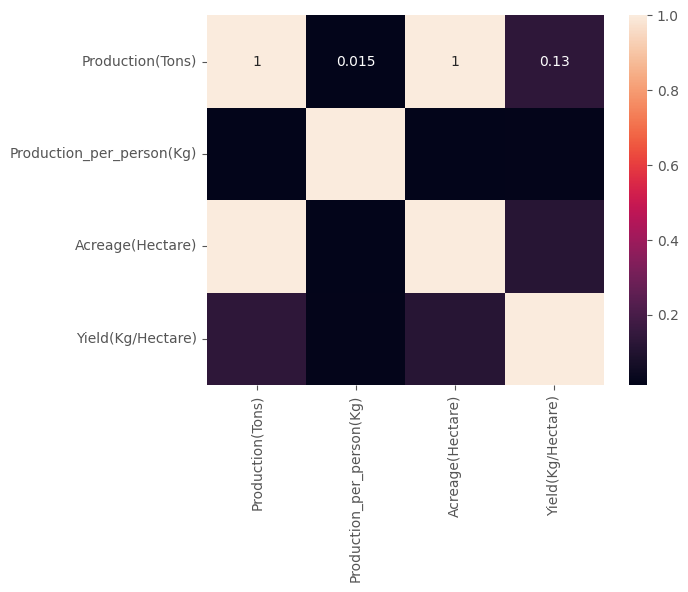

In [158]:
# Representing the corelation using heatmap from seaborn library
sns.heatmap(df.corr(), annot = df.corr())